In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt\

#Reading a car data
df=pd.read_csv("cardata.csv")
df.head()
df.shape


(301, 9)

In [82]:
# to check the null values in thhe data

df.isnull().sum()

#since the sum returns zero for all attributes  there are no null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [83]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [84]:
df['present_year']=2021
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,present_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [85]:
df['no_of_years']=df.present_year-df.Year
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,present_year,no_of_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [86]:
df.drop(['Year','present_year','Car_Name'],axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [87]:
print(df.Fuel_Type.unique())
print(df.Transmission.unique())
print(df.Seller_Type.unique())
print(df.Owner.unique())

['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
['Dealer' 'Individual']
[0 1 3]


In [88]:
#To convert catagorical variables into integers we use dummy columns or by using label encoder

# also keep drop_first argument a true to avoid dummy trap

df=pd.get_dummies(df,drop_first=True)
final_dataset=df
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [89]:
import seaborn as sns

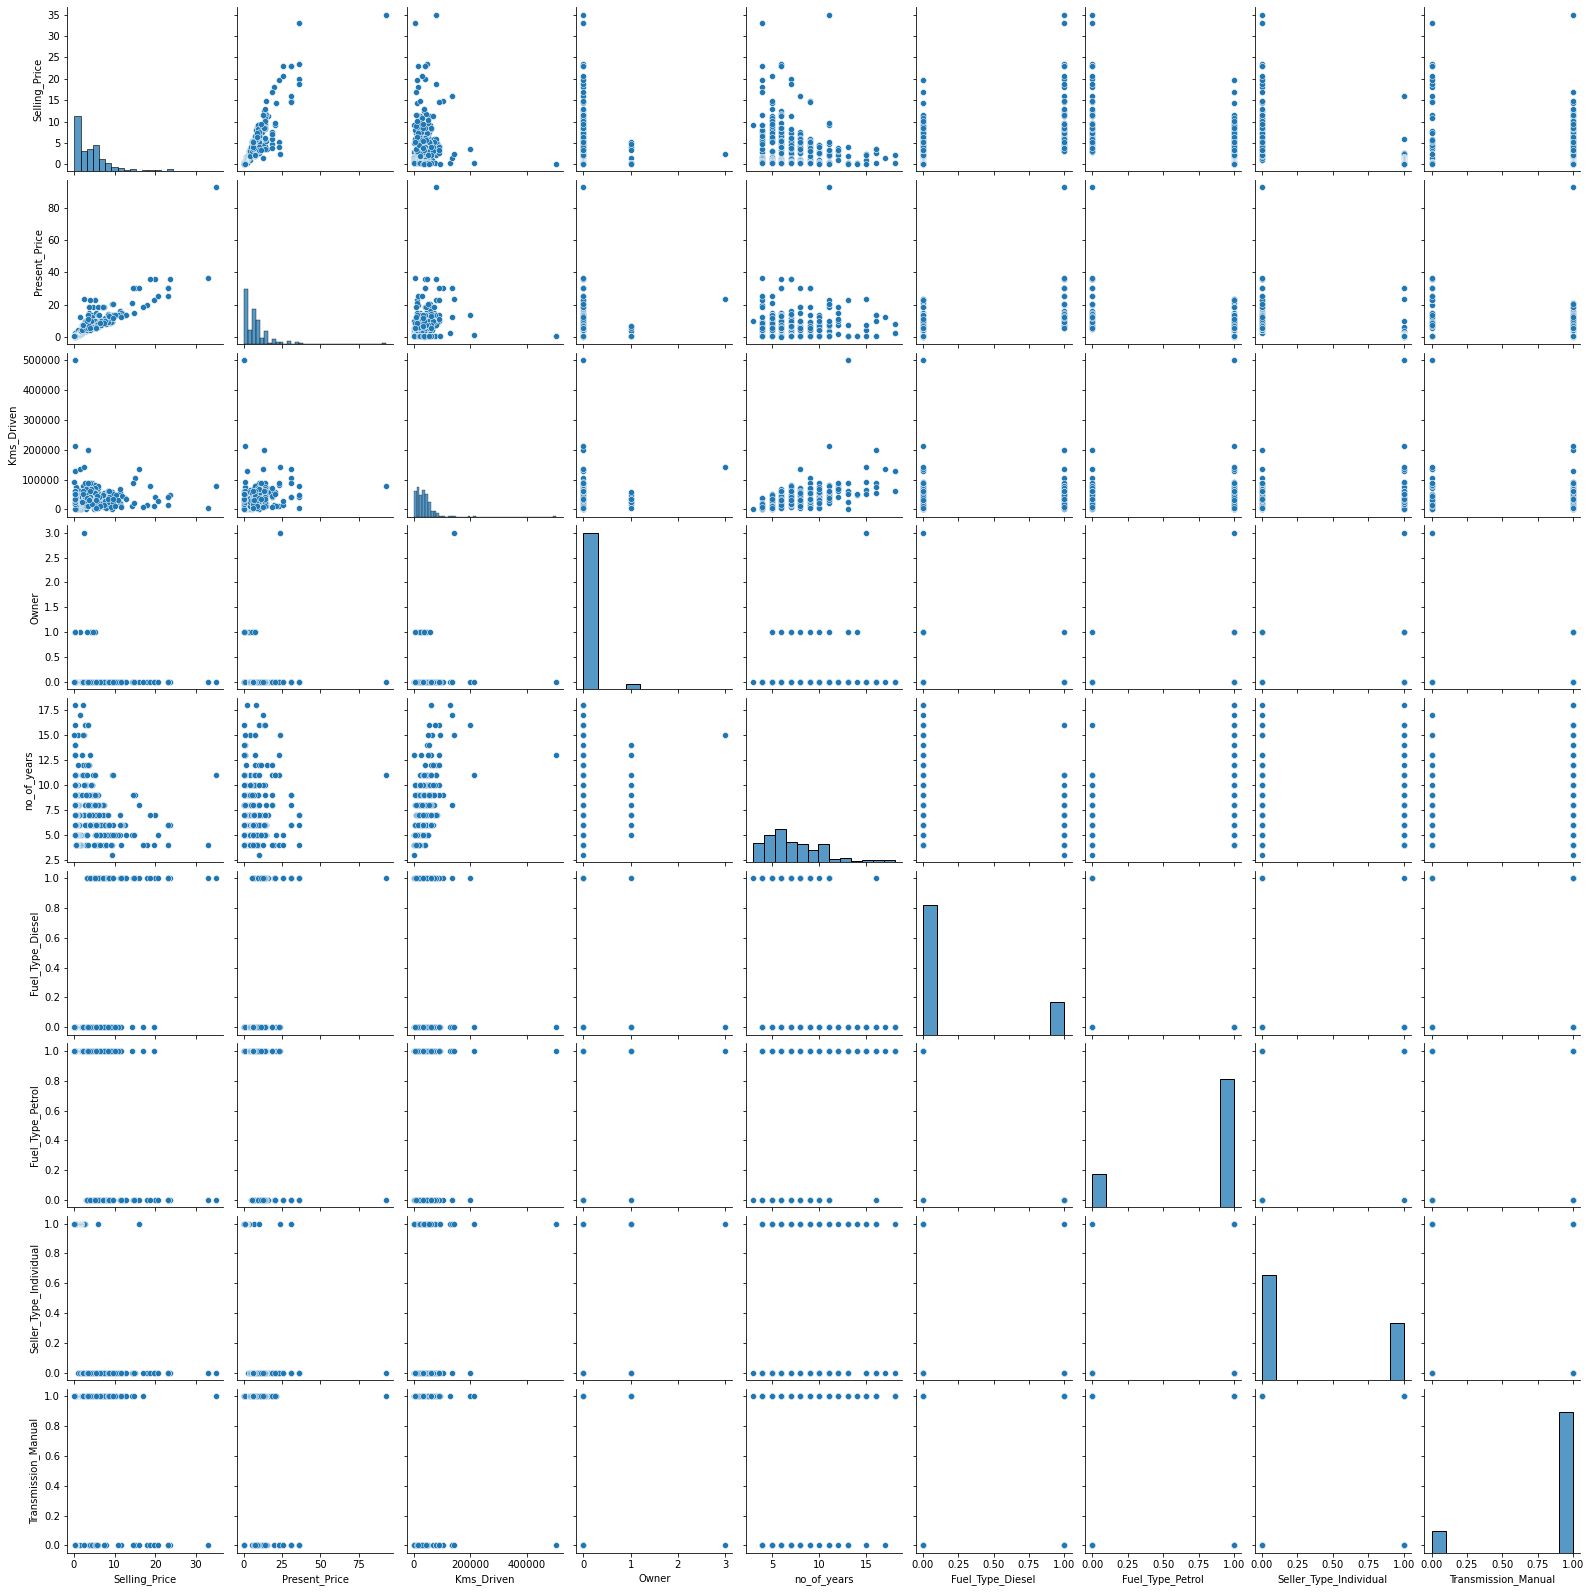

In [90]:
sns.pairplot(final_dataset)

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

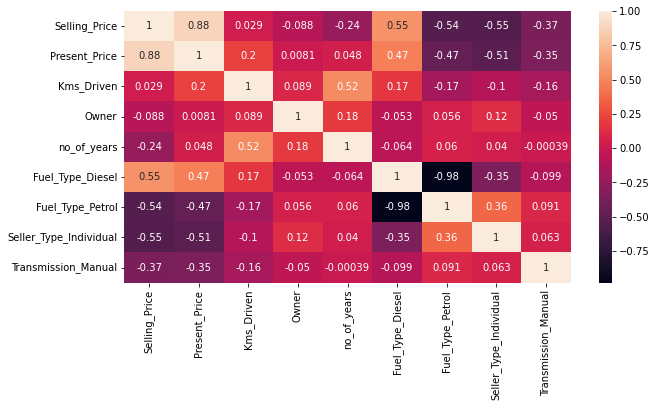

In [92]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,5))

# to plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True)

In [93]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [94]:
X.head()

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [95]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

In [96]:
print(model.feature_importances_)

[0.41073617 0.04147837 0.00042307 0.07446547 0.20378632 0.01746744
 0.12528086 0.1263623 ]


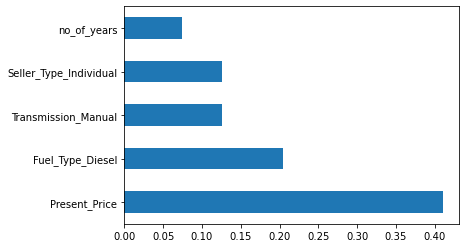

In [97]:
## to find which features are important 

feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')   ## to find top 5 most important features
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [99]:
X_train.shape

(240, 8)

In [100]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(X,y)

RandomForestRegressor()

In [101]:
rfg.predict(X_test)

array([ 5.1318,  0.5446,  4.5732,  0.1896,  0.2672, 12.542 ,  7.1005,
        1.1742,  0.4747,  3.2435,  0.6628,  4.097 ,  4.1845,  0.144 ,
        0.571 ,  4.536 ,  0.9128,  6.5135,  0.4958, 22.8524,  2.2205,
        5.101 ,  0.6651,  5.6075,  2.953 ,  3.927 ,  1.2046,  1.0118,
        4.0375, 10.1065,  1.5905,  8.027 ,  2.754 ,  7.3238,  0.2394,
       29.1684,  3.0365,  6.4508,  0.3752,  0.4922,  0.4215,  5.5325,
        0.5173,  0.4626,  0.632 ,  2.7725,  0.4764,  4.5875,  0.4092,
        7.1555, 15.5147,  5.84  ,  3.2685,  0.3679,  0.4443,  1.0535,
        1.1263,  0.4715,  0.2833,  0.2426,  7.1185])

In [107]:
rfg.score(X_test,y_test)

0.9800569253634834

In [108]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X,y)


LinearRegression()

In [104]:
model1.score(X_test,y_test)

0.9042727265283609